# Análisis de resultados experimentales

### Lectura de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

path_knn = 'Resultados/knn/'
path_radial_basis = 'Resultados/radial_basis_kernel/'
path_linear = 'Resultados/linear_kernel/'



#  KNN
knn_non_stratified_k_fold = pd.read_csv(path_knn + 'non_stratified_k_fold.csv', index_col=0, sep=";")


# Radial Basis
radial_basis_bootstrap = pd.read_csv(path_radial_basis + 'bootstrap.csv', index_col=0, sep=";")
radial_basis_stratified_k_fold = pd.read_csv(path_radial_basis + 'stratified_k_fold.csv', index_col=0, sep=";")
radial_basis_non_stratified_k_fold = pd.read_csv(path_radial_basis + 'non_stratified_k_fold.csv', index_col=0, sep=";")

# Linear
linear_bootstrap = pd.read_csv(path_linear + 'bootstrap.csv', index_col=0, sep=";")
linear_stratified_k_fold = pd.read_csv(path_linear + 'stratified_k_fold.csv', index_col=0, sep=";")
linear_non_stratified_k_fold = pd.read_csv(path_linear + 'non_stratified_k_fold.csv', index_col=0, sep=";")


### Número de características vs. Número de cortes

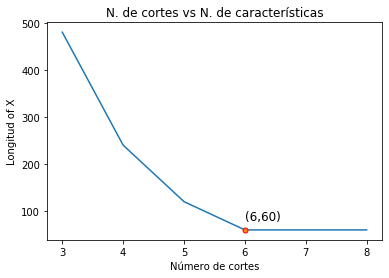

In [2]:
pairs = knn_non_stratified_k_fold[['Number of cuts','Length of X']].copy()
pairs.drop_duplicates(inplace=True)


length_x = pairs['Length of X'].tolist()
number_of_cuts = pairs['Number of cuts'].tolist()

plt.plot(number_of_cuts,
         length_x)

plt.plot(6,60,marker="o", markersize=5, markeredgecolor="red")

plt.text(6, 80, '(6,60)', fontsize=12)
plt.title("N. de cortes vs N. de características")
plt.xlabel("Número de cortes")
plt.ylabel("Longitud of X")
plt.show()

# K Nearest Neighbor (KNN)

## Stratified K folds

#### Matriz de correlaciones entre datos experimentales

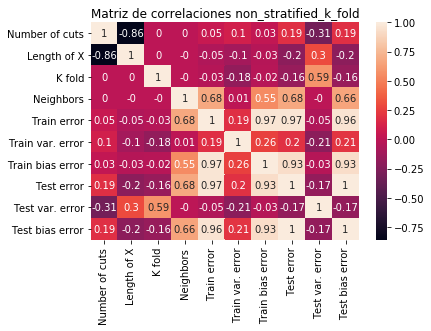

In [15]:
corrMatrix= knn_non_stratified_k_fold.corr()
corrMatrix = corrMatrix.round(2)
sn.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlaciones non_stratified_k_fold")
plt.show()

### Número de folds vs. Error

#### Training

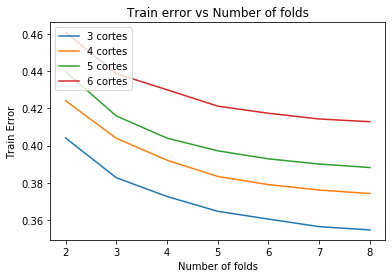

In [4]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_k = 5

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K fold'],filtered_data['Train error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Train error vs Number of folds")
plt.xlabel("Number of folds")
plt.ylabel("Train Error")
plt.show()

#### Test

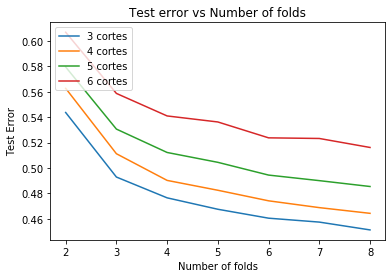

In [5]:
number_of_cuts = range(3,7,1)
fixed_k = 1

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K fold'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test error vs Number of folds")
plt.xlabel("Number of folds")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Error

#### Training

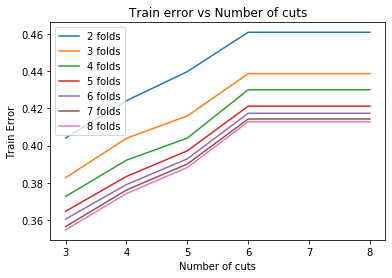

In [6]:
k_folds = knn_non_stratified_k_fold['K fold'].unique()
k_folds
fixed_k = 5

for k_fold in k_folds:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['K fold'] == k_fold) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train error'], label = f'{k_fold} folds')
    
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Train error vs Number of cuts")
plt.ylabel("Train Error")
plt.show()

### Test

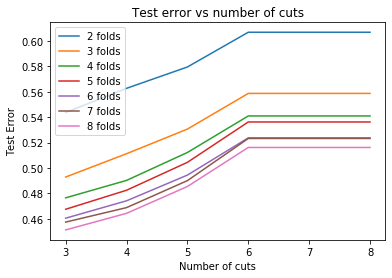

In [7]:
k_folds = knn_non_stratified_k_fold['K fold'].unique()
k_folds
fixed_k = 1

for k_fold in k_folds:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['K fold'] == k_fold) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test error'], label = f'{k_fold} folds')
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Test error vs number of cuts")
plt.ylabel("Test Error")
plt.show()

### Cantidad de vecinos (K) vs Error

#### Training

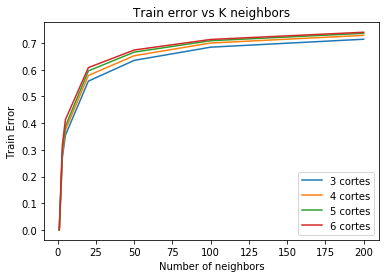

In [8]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_fold = 8

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['K fold'] == fixed_fold)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Train error'], label = f'{cut} cortes')

plt.legend(loc="lower right")
plt.title("Train error vs K neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Train Error")
plt.show()

#### Test

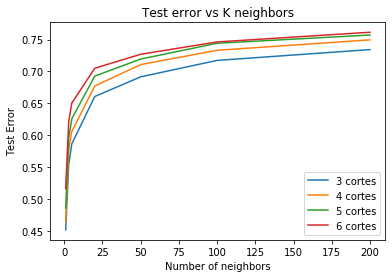

In [9]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_fold = 8

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['K fold'] == fixed_fold)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Test error vs K neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Test Error")
plt.show()

### Varianza vs folds 

#### Training

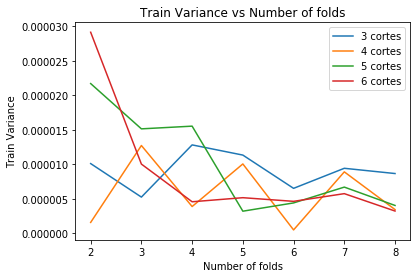

In [10]:
number_of_cuts = range(3,7,1)
fixed_k = 20
neighbors = [1, 3, 5, 20, 50, 100, 200]

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K fold'],filtered_data['Train var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper right")
plt.title("Train Variance vs Number of folds")
plt.xlabel("Number of folds")
plt.ylabel("Train Variance")
plt.show()

#### Test

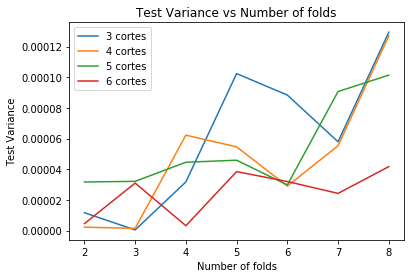

In [21]:
number_of_cuts = range(3,7,1)
fixed_k = 1

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['Neighbors'] == fixed_k)]
    plt.plot(filtered_data['K fold'],filtered_data['Test var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test Variance vs Number of folds")
plt.xlabel("Number of folds")
plt.ylabel("Test Variance")
plt.show()

### Cantidad de vecinos (k) vs Bias

#### Training

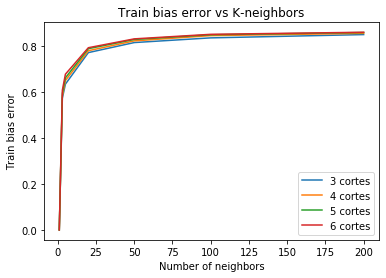

In [12]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_fold = 2

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['K fold'] == fixed_fold)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Train bias error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Train bias error vs K-neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Train bias error")
plt.show()

#### Test

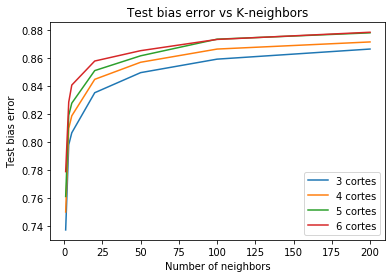

In [13]:
number_of_cuts = range(3,7,1)
number_of_cuts
fixed_fold = 2

for cut in number_of_cuts:
    filtered_data = knn_non_stratified_k_fold[(knn_non_stratified_k_fold['Number of cuts'] == cut) & (knn_non_stratified_k_fold['K fold'] == fixed_fold)]
    plt.plot(filtered_data['Neighbors'],filtered_data['Test bias error'], label = f'{cut} cortes')
    
plt.legend(loc="lower right")
plt.title("Test bias error vs K-neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Test bias error")
plt.show()

### Selección mayor y peor error

In [14]:
knn_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
modelo_menor_bias = knn_non_stratified_k_fold[:1]

knn_non_stratified_k_fold.sort_values(by='Test bias error', ascending = False, inplace = True)
modelo_mayor_bias = knn_non_stratified_k_fold[:1]


modelo_mayor_bias
modelo_menor_bias

,Number of cuts,Length of X,K fold,Neighbors,Train error,Train var. error,Train bias error,Train list errors,Test error,Test var. error,Test bias error,Test list errors
42,3,480,8,1,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.451252,0.000129,0.671657,"[0.451232, 0.465517, 0.434483, 0.466502, 0.458..."
